# Scissors Paper Rock data analysis (modules 3 and 4)

_Copyright © 2020-, Julio Correa, Joseph T. Lizier; based on the original Matlab tutorials. Distributed under GNU General Public License v3_

We will analyse the uncertainties and information contents of some sample Scissors-Paper-Rock gameplay.

## Initial Questions:

* Why are we interested in using measures of information theory to analyse this data set?
* What in particular might we wish to measure?
* _Information theory is all about questions and answers_. What questions might we ask of the data? What hypotheses might we have about the answers?

# Stage 1 - Familiarisation

We've done a lot of the data plumbing for you, so that we can concentrate on computing the information-theoretic quantities. Data plumbing is an important part of any analysis though, so do take a look in more detail at how the code was set up at some point.

Note that these utilies require the additional libraries: `pandas` and `re`

In [1]:
# Import the Scissors-Paper-Rock utilies
import sprutils
# Other libraries we require here:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

For now though, let's get things working and start to explore the data set.

1. Please download a copy of the relevant *data set* (following instructions on the Module 3 page). Unzip them to any convenient location on your computer.
2. Open the folder where the gameplay data set is stored. Open any file in a text editor, which includes the data for a game between two named players. The file contains each iteration of the game on one line, with $\{0,1,2\}$ encoding the player's selections amongst _{scissors,paper,rock}_.
3. Set the appropriate paths in the code below for the following:<br/>
    For the `simpleinfotheory` scripts, make sure you haved gathered the new functions you wrote into your `simpleinfotheory.py` script, and make sure it is referencable from here (you may need to change the folder referenced below) before you run the import line in the next cell:

In [2]:
# Set path for where your Scissors-Paper-Rock data files are stored:
sprutils.setDataPath("../ScissorsPaperRock-SampleData")

# Set the path for where your Matlab entropy scripts are from the previous modules
# (if you are confident that they are working, or else the completed code solutions).
import sys
sys.path.append('../../Module01-Entropy/PythonSimpleFunctions/completed/')
import simpleinfotheory

4. Run `sprutils.listPlayers(True)` below to print and also return a list of which player names you can analyse.

In [3]:
sprutils.listPlayers(True)

Player names:
Player1
Player2
Player3
Player4
Player5
Player6
Player7


['Player1', 'Player2', 'Player3', 'Player4', 'Player5', 'Player6', 'Player7']

&nbsp;&nbsp;&nbsp;&nbsp; You can run `players = sprutils.listPlayers()` and then access each player name after that function call via `players[0]`, `players[1]`  etc up to `players[len(players)-1]`.

In [4]:
players = sprutils.listPlayers()
players[len(players)-1]

'Player7'

5. Run `sprutils.loadGamesForPlayer(name, True)`, where `name` is the name string for any player (e.g. `'Joe'`), to display the games (including moves and results) for that player. Note: You can call `sprutils.loadGamesForPlayer('*', True)`, i.e. with name `'*'`, to get the data for all players.<br/>
    The function can be called as `games = sprutils.loadGamesForPlayer(name)` to return a list of the data for each game for that player, which will be used in our information-theoretic analysis later. Each item in the list, e.g. `games[i]`, is a 2D numpy array for the given game index, where:
    * the first column `games[i][:,0]` is the moves of the named player ({0,1,2} for {scissors,paper,rock}),
    * the second column `games[i][:,1]` is the moves of their opponent, and
    * the third column `games[i][:,2]` is the result for this player ({1,0,-1} for {win,tie,loss}).

In [5]:
agData = sprutils.loadGamesForPlayer('*', True)

Game 0 for * (20 iterations):
Player1:	scis,	Player2:	rock,	result: los
Player1:	scis,	Player2:	papr,	result: win
Player1:	papr,	Player2:	rock,	result: win
Player1:	scis,	Player2:	papr,	result: win
Player1:	rock,	Player2:	papr,	result: los
Player1:	scis,	Player2:	rock,	result: los
Player1:	papr,	Player2:	scis,	result: los
Player1:	papr,	Player2:	papr,	result: tie
Player1:	scis,	Player2:	rock,	result: los
Player1:	scis,	Player2:	papr,	result: win
Player1:	scis,	Player2:	papr,	result: win
Player1:	papr,	Player2:	papr,	result: tie
Player1:	rock,	Player2:	rock,	result: tie
Player1:	rock,	Player2:	rock,	result: tie
Player1:	scis,	Player2:	rock,	result: los
Player1:	scis,	Player2:	rock,	result: los
Player1:	rock,	Player2:	scis,	result: win
Player1:	rock,	Player2:	papr,	result: los
Player1:	scis,	Player2:	papr,	result: win
Player1:	papr,	Player2:	rock,	result: win

Game 1 for * (20 iterations):
Player2:	rock,	Player1:	scis,	result: win
Player2:	papr,	Player1:	scis,	result: los
Player2:	rock,	

# Stage 2 - Entropy calculations

We will analyse the uncertainty in various player's moves using Shannon entropy, and consider whether this relates to their performance in the game. (Do you have a hypothesis on this?)

1. See the function `computeEntropyForPlayer(name)` below. This aims to compute the entropy of moves for a given named player, over all the iterations in all of their games. The code retrieves the data for each game of this player using `loadGamesForPlayer(name)`, then loops over each game. Fill out the missing parts of code:
    * In the loop, pull out the moves for that player (and their results), and append them into the arrays used to store these values over all iterations. A helpful hint is that if you had a 2D matrix data, and you wanted to pull out the first column of its contents, you would do this as: `data[:,0]` (but an extra reshape is need to keep it as a column).
    * Compute the entropy over the players' moves, using our `simpleinfotheory.entropyempirical()` function.


In [6]:
"""function computeEntropyForPlayer()

Compute the entropy of moves for a given player, across all games/iterations

Inputs:
- name - name of the player
- verbose - whether to print entropy out

Outputs:
- calculatedEntropy
- winRate
- lossRate
- numGames

Copyright (C) 2020-, Julio Correa, Joseph T. Lizier
Distributed under GNU General Public License v3
"""
def computeEntropyForPlayer(name: str, verbose: bool=False):
    
    # Step 1: load all of the player's games' data:
    games = sprutils.loadGamesForPlayer(name)
    
    # Step 2: the player's moves are in the first column, pull these from
    #  each game into an array of samples that we can compute entropy on:
    moves = np.empty((0,1)) # empty column
    results = np.empty((0,1)) # empty column
    for gm in games:
        # First column of numpy array gm is the player's move, second is opponent's
        #  and third is the result.
        # Pull out the player's moves in this game (first column of gm):
        #  (reshape is required to keep it as a column rather than row vector)
        movesInThisGame = gm[:,0].reshape(gm.shape[0],1)
        # Pull out the results in this game (third column of gm) as a column:
        resultsInThisGame = gm[:,2].reshape(gm.shape[0],1)
        # Append this player's moves to the array we're storing over all iterations:
        moves = np.row_stack((moves, movesInThisGame)) if moves.size else movesInThisGame
        # Append this player's results to the array over all iterations:
        results = np.row_stack((results, resultsInThisGame)) if results.size else resultsInThisGame
    
    # Step 3: compute the entropy for this player's moves using our existing scripts:
    # (Don't forget that if your entropy script is returning a tuple, you just want the [0] entry)
    calculatedEntropy = simpleinfotheory.entropyempirical(moves)[0] # [0] takes the value only

    # Step 4: compute the win and loss rates:
    winRate = np.sum(results == 1)/len(results)
    lossRate = np.sum(results == -1)/len(results)
    numGames = len(results)

    if (verbose):
        print('Entropy for %s over %d iterations: %.04f' % (name, numGames, calculatedEntropy))

    return calculatedEntropy, winRate, lossRate, numGames

2. Call the script for a few different players, e.g. `computeEntropyForPlayer('Joe')`, and compare.

In [7]:
computeEntropyForPlayer(players[0])

(1.5729262036887497, 0.4, 0.425, 40)

3. Now call it using all players' data at once, in a single calculation: `computeEntropyForPlayer('*')`. What implicit assumption(s) are we making when we analyse the data in this way? What question is it asking of the data?

In [8]:
computeEntropyForPlayer('*')

(1.5733842558479327, 0.36666666666666664, 0.36666666666666664, 300)

4. See the function `computeEntropyForAllPlayers()` below. This aims to compute entropy of moves for each player in turn (considering each player separately), then plots these, and looks for relationships between entropy and win/loss rates. Fill out the missing parts of code:
    * In the loop over player names, use our previous function `computeEntropyForPlayer` to compute the entropy for that player.
    * Once we have the entropy for each player and their win / loss ratios, compute the correlation between entropy and win ratio, and entropy and loss ratio. _HINT_: Use the `stats.pearson()` or `stats.spearmanr()` correlation functions from the `scipy.stats` library -- make sure that you check what is returned from this function call.

In [9]:
"""function computeEntropyForAllPlayers()

Compute the entropy of moves for each player, across all games/iterations

Outputs:
- names
- entropies
- winRates
- lossRates

Copyright (C) 2020-, Julio Correa, Joseph T. Lizier
Distributed under GNU General Public License v3
"""
def computeEntropyForAllPlayers():
    
    # Step 1: load all of the player's names:
    names = sprutils.listPlayers()
    # Step 2: compute entropy for each player
    index = 0
    entropies = np.zeros(len(names))
    winRates = np.zeros(len(names))
    lossRates = np.zeros(len(names))
    
    for name in names:
        # Compute the entropy for the moves of this player.
        # HINT: use the script that you just completed passing in name
        calculatedEntropy, winRate, lossRate, numGames = computeEntropyForPlayer(name)
        print('{} = {:.03f} bits,\twin rate = {:.03f},\tloss rate = {:.03f}, num games = {}'.\
              format(name, calculatedEntropy, winRate, lossRate, numGames))
        
        entropies[index] = calculatedEntropy
        winRates[index] = winRate
        lossRates[index] = lossRate

        index += 1
    
    # Plot the winRates and lossRates versus entropies:
    plt.figure();
    plt.scatter(entropies, winRates, c='red', marker='x');
    plt.title('Win rates versus entropies of single players')
    plt.xlabel('Entropy of moves (bits)')
    plt.ylabel('Win rate')
    
    plt.figure();
    plt.scatter(entropies, lossRates, c='red', marker='x');
    plt.title('Loss rates versus entropies of single players')
    plt.xlabel('Entropy of moves (bits)')
    plt.ylabel('Loss rate')

    # Compute correlations and check if these are statistically significant:
    # Are these statistically significant?
    winToEntropyCorr, winToEntropyCorrPValue = stats.pearsonr(winRates,entropies)
    lossToEntropyCorr, lossToEntropyCorrPValue = stats.pearsonr(lossRates,entropies)

    print('Correlation of win  rate to entropy is: {:.04f} (pValue {:.04f})'.\
        format(winToEntropyCorr, winToEntropyCorrPValue))
    print('Correlation of loss rate to entropy is: {:.04f} (pValue: {:.04f})'.\
        format(lossToEntropyCorr, lossToEntropyCorrPValue))

    return names, entropies, winRates, lossRates

5. Call the function to see the entropies of each player, the plots and correlation analyses on how this related to performance. Whose moves was there most uncertainty about? Did this correlate to wins? What about losses? Does this match your hypothesis?

Player1 = 1.573 bits,	win rate = 0.400,	loss rate = 0.425, num games = 40
Player2 = 1.297 bits,	win rate = 0.350,	loss rate = 0.425, num games = 40
Player3 = 1.196 bits,	win rate = 0.450,	loss rate = 0.350, num games = 40
Player4 = 1.515 bits,	win rate = 0.425,	loss rate = 0.275, num games = 40
Player5 = 1.472 bits,	win rate = 0.275,	loss rate = 0.425, num games = 40
Player6 = 1.000 bits,	win rate = 0.400,	loss rate = 0.280, num games = 50
Player7 = 1.581 bits,	win rate = 0.280,	loss rate = 0.400, num games = 50
Correlation of win  rate to entropy is: -0.4175 (pValue 0.3513)
Correlation of loss rate to entropy is: 0.4723 (pValue: 0.2845)


(['Player1', 'Player2', 'Player3', 'Player4', 'Player5', 'Player6', 'Player7'],
 array([1.5729262 , 1.29708926, 1.1964264 , 1.51544065, 1.4722463 ,
        1.        , 1.58087864]),
 array([0.4  , 0.35 , 0.45 , 0.425, 0.275, 0.4  , 0.28 ]),
 array([0.425, 0.425, 0.35 , 0.275, 0.425, 0.28 , 0.4  ]))

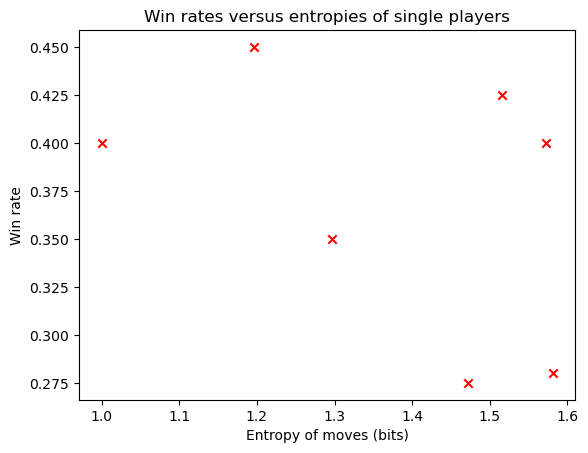

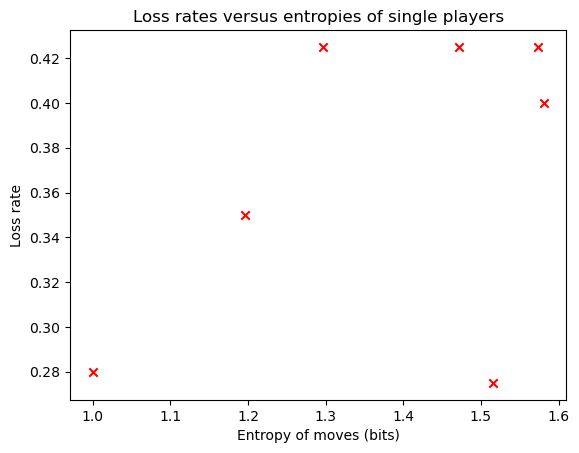

In [10]:
computeEntropyForAllPlayers()

6. _Challenge_: are these correlation values statistically significant? Look up theory on how to compute whether a correlation value is statistically significant. To add this to the code above, you can check out the other return values from the `stats.pearson()` or `stats.spearmanr()` correlation functions.

We will continue to investigate relationships between variables in this data set once we have learned about the mutual information.

# Stage 3 - Conditional entropy calculations

Take a moment to reflect on our initial questions, right up the top of this notebook.

We will now analyse the conditional uncertainty in the player's moves, given their previous move, and consider whether this relates to their performance in the game. (Do you have a hypothesis on this?).
_The coding is very similar to what you already did in stage 2 previously._

1. See the function `computeConditionalEntropyForPlayer(name)` below.
This aims to compute the entropy of moves for a given named player, conditioned on their previous move, over all the iterations in all of their games. The code retrieves the data for each game of this player using `loadGamesForPlayer(name)`, then loops over each game. Fill out the missing parts of code:
    * In the loop, pull out the moves for that player, their previous moves (and the results on the current, not previous, move), and append them into the arrays used to store these values over all iterations. Take care:
        * You can only pull out moves which have a paired sample of a previous move in the given game. This means the moves from the 2nd iteration onwards. A helpful hint is that if you had a 2D matrix data, and you wanted to pull out the first column of its contents, but only from the 2nd row onwards, you could first pull out the first column as `myColumn = data[:,0]` and then pull the 2nd row onwards as `myColumn[1:]`. (You could do this in one go as: `data[1:,0]`).
        * Similarly, you can only pull out previous moves which have a paired sample of a next move in the given game. This means the moves up to the 2nd last iteration. A helpful hint there is that if you had a 2D matrix data, and you wanted to pull out the first column 1 of its contents, but only up to the 2nd last row, you would first pull out the first column as `myColumn = data[:,0]` and then pull out all rows but the last as `myColumn[:-1]`. (You could do this in one go as: `data[:-1,0]`).
        * You should also only pull out samples of results that relate to the current (but not previous) moves.
    * Compute the conditional entropy over the players' moves given their previous moves, using your (or my) `simpleinfotheory.conditionalentropyempirical()` function.

In [11]:
"""function computeConditionalEntropyForPlayer()

Compute the conditional entropy of moves for a given player, conditioned on
 their previous move across all games/iterations

Inputs:
- name - name of the player
- verbose - whether to print entropy out

Outputs:
- calculatedEntropy
- winRate
- lossRate
- numGames

Copyright (C) 2020-, Julio Correa, Joseph T. Lizier
Distributed under GNU General Public License v3
"""
def computeConditionalEntropyForPlayer(name: str, verbose: bool=False):

    # Step 1: load all of the player's games' data:
    games = sprutils.loadGamesForPlayer(name)
    
    # Step 2: the player's moves are in the first column, pull these from
    #  each game into arrays of samples that we can compute conditional entropy on:
    nextMoves = np.empty((0,1)) # empty column
    previousMoves = np.empty((0,1)) # empty column
    results = np.empty((0,1)) # empty column
    
    for gm in games:
        # First column of numpy array gm is the player's move, second is opponent's
        #  and third is the result.
        # Pull out the player's moves in this game (first column of gm):
        #  (reshape is required to keep it as a column rather than row vector)
        movesInThisGame = gm[:,0].reshape(gm.shape[0],1)
        # Pull out the results in this game (third column of gm) as a column:
        resultsInThisGame = gm[:,2].reshape(gm.shape[0],1)
        
        # Append this player's moves to the array we're storing over all iterations.
        #  TAKE CARE: Can we take all samples here, or only a limited number that
        #  we're able to match up properly to compute conditional entropy?
        nextMoves = np.row_stack((nextMoves, movesInThisGame[1:])) if nextMoves.size else movesInThisGame[1:]
        previousMoves = np.row_stack((previousMoves, movesInThisGame[:-1])) if previousMoves.size else movesInThisGame[:-1]
        # Append this player's results to the array over all iterations:
        #  Which results do we want here -- those of the previous iteration or this one?
        results = np.row_stack((results, resultsInThisGame[1:])) if results.size else resultsInThisGame[1:]
    
    # Step 3: compute the condtional entropy for this player's moves using our existing scripts:
    calculatedEntropy = simpleinfotheory.conditionalentropyempirical(nextMoves, previousMoves)
    
    # Step 4: compute the win and loss rates:
    winRate = np.sum(results == 1)/len(results)
    lossRate = np.sum(results == -1)/len(results)
    numGames = len(results)

    if verbose:
        print('Conditional entropy for {} over {} iterations: {:.04f}'.\
                format(name, numGames, calculatedEntropy))
                          
    return calculatedEntropy, winRate, lossRate, numGames

2. Call the script for a few different players, e.g. `computeConditionalEntropyForPlayer('Joe')`, and compare.

In [12]:
computeConditionalEntropyForPlayer(players[0], True)

Conditional entropy for Player1 over 38 iterations: 1.5188


(1.518784923363066, 0.42105263157894735, 0.39473684210526316, 38)

3. Now call it to compute the conditional entropy using samples for all players' data in the one calculation: `computeConditionalEntropyForPlayer('*')`. What implicit assumption are we making when we analyse the data in this way?

In [13]:
computeConditionalEntropyForPlayer('*', True)

Conditional entropy for * over 290 iterations: 1.5602


(1.5601520681645509, 0.36551724137931035, 0.36551724137931035, 290)

4. See the function `computeConditionalEntropyForAllPlayers()` below.
This aims to compute conditional entropy of moves for each player in turn (considering each player separately), then plots these, and looks for relationships between conditional entropy and win/loss rates. Fill out the missing parts of code:
    * In the loop over player names, use our previous function `computeConditionalEntropyForPlayer()` to compute the conditional entropy for that player.
    * Once we have the conditional entropy for each player and their win / loss ratios, compute the correlation between conditional entropy and win ratio, and entropy and loss ratio. _HINT_: Use the `stats.pearson()` or `stats.spearmanr()` correlation functions from the `scipy.stats` library -- make sure that you check what is returned from this function call.

In [14]:
"""function computeConditionalEntropyForAllPlayers()

Compute the conditional entropy of moves for each player, conditioned on their previous move,
 across all games/iterations

Outputs:
- names
- entropies
- winRates
- lossRates

Copyright (C) 2020-, Julio Correa, Joseph T. Lizier
Distributed under GNU General Public License v3
"""
def computeConditionalEntropyForAllPlayers():

    # Step 1: load all of the player's names:
    names = sprutils.listPlayers()
    # Step 2: compute entropy for each player
    index = 0
    entropies = np.zeros(len(names))
    winRates = np.zeros(len(names))
    lossRates = np.zeros(len(names))
    
    for name in names:
        # Compute the entropy for the moves of this player.
        # HINT: use the script that you just completed passing in name
        calculatedEntropy, winRate, lossRate, numGames = computeConditionalEntropyForPlayer(name)
        print('{} = {:.03f} bits,\twin rate = {:.03f},\tloss rate = {:.03f}, num games = {}'.\
              format(name, calculatedEntropy, winRate, lossRate, numGames))

        entropies[index] = calculatedEntropy
        winRates[index] = winRate
        lossRates[index] = lossRate

        index += 1
   
    # Plot the winRates and lossRates versus entropies:
    plt.figure();
    plt.scatter(entropies, winRates, c='red', marker='x');
    plt.title('Win rates versus cond entropies of single players')
    plt.xlabel('Entropy of moves (bits)')
    plt.ylabel('Win rate')
    
    plt.figure();
    plt.scatter(entropies, lossRates, c='red', marker='x');
    plt.title('Loss rates versus cond entropies of single players')
    plt.xlabel('Entropy of moves (bits)')
    plt.ylabel('Loss rate')

    # Compute correlations and check if these are statistically significant:
    # Are these statistically significant?
    winToEntropyCorr, winToEntropyCorrPValue = stats.pearsonr(winRates,entropies)
    lossToEntropyCorr, lossToEntropyCorrPValue = stats.pearsonr(lossRates,entropies)

    print('Correlation of win  rate to entropy is: {:.04f} (pValue {:.04f})'.\
        format(winToEntropyCorr, winToEntropyCorrPValue))
    print('Correlation of loss rate to entropy is: {:.04f} (pValue: {:.04f})'.\
        format(lossToEntropyCorr, lossToEntropyCorrPValue))

    return names, entropies, winRates, lossRates

5. Call the script to see the conditional entropies of each player, the plots and correlation analyses on how this related to performance. Whose was most (conditionally) uncertainty? Did this correlate to wins? What about losses? Does this match your hypothesis?

Player1 = 1.519 bits,	win rate = 0.421,	loss rate = 0.395, num games = 38
Player2 = 1.147 bits,	win rate = 0.342,	loss rate = 0.447, num games = 38
Player3 = 1.168 bits,	win rate = 0.447,	loss rate = 0.368, num games = 38
Player4 = 1.464 bits,	win rate = 0.410,	loss rate = 0.282, num games = 39
Player5 = 1.440 bits,	win rate = 0.282,	loss rate = 0.410, num games = 39
Player6 = 0.730 bits,	win rate = 0.408,	loss rate = 0.265, num games = 49
Player7 = 1.407 bits,	win rate = 0.265,	loss rate = 0.408, num games = 49
Correlation of win  rate to entropy is: -0.2820 (pValue 0.5401)
Correlation of loss rate to entropy is: 0.4219 (pValue: 0.3457)


(['Player1', 'Player2', 'Player3', 'Player4', 'Player5', 'Player6', 'Player7'],
 array([1.51878492, 1.14747619, 1.16839833, 1.4636343 , 1.44030896,
        0.72993957, 1.40677332]),
 array([0.42105263, 0.34210526, 0.44736842, 0.41025641, 0.28205128,
        0.40816327, 0.26530612]),
 array([0.39473684, 0.44736842, 0.36842105, 0.28205128, 0.41025641,
        0.26530612, 0.40816327]))

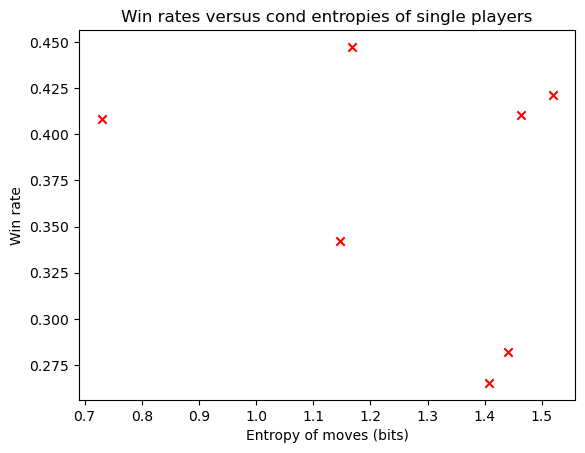

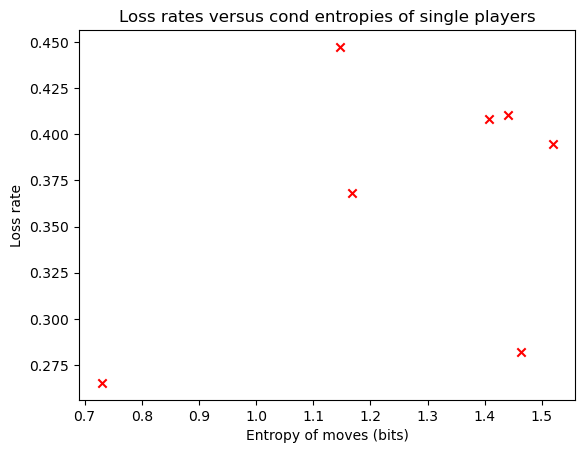

In [15]:
computeConditionalEntropyForAllPlayers()

6. _Challenge_: are these correlation values statistically significant? As per stage 2, look up theory on how to compute whether a correlation value is statistically significant. To add this to the code above, you can check out the other return values from the `stats.pearson()` or `stats.spearmanr()` correlation functions.

# Stage 4 - Mutual information calculations

We will now analyse the mutual information in the player's previous moves to their next move, and consider whether this relates to their performance in the game. Different to the above, here we're going to look at relationships not only to the player's own previous move but also to their opponent's previous move. (Do you have a hypothesis on this?).
_The coding is very similar to what you already did in stage 3 above._

1. See the function `computeConditionalEntropyForPlayer(name)` below.
This aims to compute the mutual information of moves for a given named player to their previous move (or those of their opponent), over all the iterations in all of their games. The code retrieves the data for each game of this player using `loadGamesForPlayer(name)`, then loops over each game. Fill out the missing parts of code:
    * In the loop, pull out the moves for that player, their previous moves or that of their opponent (and the results on the current, not previous, move), and append them into the arrays used to store these values over all iterations. Take note of how you performed the similar operations for the conditional entropy.
    * Compute the mutual information between the moves and previous moves, using our `simpleinfotheory.mutualinformationempirical()` function.

In [16]:
"""function computeMutualInformationForPlayer()

Compute the mutual information of moves for a given player with their own
 previous move, or the previous move of their opponent

Inputs:
- name - name of the player
- fromSelf (boolean, default True) - if true, take MI from the player's own previous move; if false
    take MI from opponent's previous move.
- verbose - whether to print entropy out

Outputs:
- calculatedMI
- winRate
- lossRate
- numGames

Copyright (C) 2020-, Julio Correa, Joseph T. Lizier
Distributed under GNU General Public License v3
"""
def computeMutualInformationForPlayer(name: str, fromSelf: bool=True, verbose: bool=False):

    # Step 1: load all of the player's games' data:
    games = sprutils.loadGamesForPlayer(name)
    
    # Step 2: the player's moves are in the first column, pull these from
    #  each game into arrays of samples that we can compute mutual info on:
    nextMoves = np.empty((0,1)) # empty column
    previousMoves = np.empty((0,1)) # empty column
    results = np.empty((0,1)) # empty column
    
    for gm in games:
        # First column of numpy array gm is the player's move, second is opponent's
        #  and third is the result.
        # Pull out the player's moves in this game (first column of gm):
        #  (reshape is required to keep it as a column rather than row vector)
        movesInThisGame = gm[:,0].reshape(gm.shape[0],1)
        # Pull out the opponent's moves in this game (second column of gm):
        opponentsMovesInThisGame = gm[:,1].reshape(gm.shape[0],1)
        # Pull out the results in this game (third column of gm) as a column:
        resultsInThisGame = gm[:,2].reshape(gm.shape[0],1)
        
        # Append this player's moves to the array we're storing over all iterations.
        #  TAKE CARE: Can we take all samples here, or only a limited number that
        #  we're able to match up properly to compute mutual information?
        nextMoves = np.row_stack((nextMoves, movesInThisGame[1:])) if nextMoves.size else movesInThisGame[1:]
        if fromSelf:
            # Grab the previous moves from this player:
			# HINT: This will be the same thing you did in computeConditionalEntropyForPlayer:
            previousMoves = np.row_stack((previousMoves, movesInThisGame[:-1])) if previousMoves.size else movesInThisGame[:-1]
        else:
            # Grab the previous moves from their opponent:
            previousMoves = np.row_stack((previousMoves, opponentsMovesInThisGame[:-1])) if previousMoves.size else opponentsMovesInThisGame[:-1]
        # Append this player's results to the array over all iterations:
        #  Which results do we want here -- those of the previous iteration or this one?
        results = np.row_stack((results, resultsInThisGame[1:])) if results.size else resultsInThisGame[1:]
    
    # Step 3: compute the mutual information for this player's moves using our existing scripts:
    calculatedMI = simpleinfotheory.mutualinformationempirical(nextMoves, previousMoves)[0] # Just pulling the first element of the tuple
    
    # Step 4: compute the win and loss rates:
    winRate = np.sum(results == 1)/len(results)
    lossRate = np.sum(results == -1)/len(results)
    numGames = len(results)

    if verbose:
        print('MI for {} over {} iterations: {:.04f} bits'.\
                format(name, numGames, calculatedMI))
                          
    return calculatedMI, winRate, lossRate, numGames

2. Call the script for a few different players, e.g. `computeMutualInformationForPlayer('Joe', True)`, and compare.

In [17]:
computeMutualInformationForPlayer(players[0], True, True)
computeMutualInformationForPlayer(players[0], False, True)

MI for Player1 over 38 iterations: 0.0591 bits
MI for Player1 over 38 iterations: 0.1230 bits


(0.12304366201220818, 0.42105263157894735, 0.39473684210526316, 38)

3. Now call it to compute the mutual information using samples for all players' data in the one calculation: `computeMutualInformationForPlayer('*', True)`. What implicit assumption are we making when we analyse the data in this way?

In [18]:
computeMutualInformationForPlayer('*', True, True)
computeMutualInformationForPlayer('*', False, True)

MI for * over 290 iterations: 0.0161 bits
MI for * over 290 iterations: 0.0197 bits


(0.01965213650181097, 0.36551724137931035, 0.36551724137931035, 290)

4. See the function `computeMutualInformationForAllPlayers()` below.
This aims to compute the mutual information of moves to previous moves for each player in turn (considering each player separately), then plots these, and looks for relationships between the mutual information and win/loss rates. Fill out the missing parts of code:
    * In the loop over player names, use our previous function `computeMutualInformationForPlayer()` to compute the mutual information for that player. Take care: are we computing MI from our own previous moves or that of our opponent?
    * Once we have the mutual information for each player and their win / loss ratios, compute the correlation between mutual information and win ratio, and entropy and loss ratio. _HINT_: Use the `stats.pearson()` or `stats.spearmanr()` correlation functions from the `scipy.stats` library -- make sure that you check what is returned from this function call.

In [19]:
"""function computeMutualInformationForAllPlayers()

Compute the mutual information of moves for each player with their own
 previous move, or the previous move of their opponent, across all games/iterations.

Inputs:
- fromSelf (boolean, default True) - if true, take MI from the player's own previous move; if false
    take MI from opponent's previous move.

Outputs:
- names
- mutualInfos
- winRates
- lossRates

Copyright (C) 2020-, Julio Correa, Joseph T. Lizier
Distributed under GNU General Public License v3
"""
def computeMutualInformationForAllPlayers(fromSelf: bool = True):

    # Step 1: load all of the player's names:
    names = sprutils.listPlayers()
    # Step 2: compute mutual info for each player
    index = 0
    mutualInfos = np.zeros(len(names))
    winRates = np.zeros(len(names))
    lossRates = np.zeros(len(names))
    
    for name in names:
        # Compute the mutual info for the moves of this player.
        # HINT: use the script that you just completed passing in name and fromSelf
        calculatedMI, winRate, lossRate, numGames = computeMutualInformationForPlayer(name, fromSelf)
        print('{} = {:.03f} bits,\twin rate = {:.03f},\tloss rate = {:.03f}, num games = {}'.\
              format(name, calculatedMI, winRate, lossRate, numGames))

        mutualInfos[index] = calculatedMI
        winRates[index] = winRate
        lossRates[index] = lossRate

        index += 1
   
    # Plot the winRates and lossRates versus mutualInfos:
    plt.figure();
    plt.scatter(mutualInfos, winRates, c='red', marker='x');
    plt.title('Win rates versus mutual information for single players')
    plt.xlabel('Mutual information of moves (bits)')
    plt.ylabel('Win rate')
    
    plt.figure();
    plt.scatter(mutualInfos, lossRates, c='red', marker='x');
    plt.title('Loss rates versus mutual information of single players')
    plt.xlabel('Mutual information of moves (bits)')
    plt.ylabel('Loss rate')

    # Compute correlations and check if these are statistically significant:
    # Are these statistically significant?
    winToMICorr, winToMICorrPValue = stats.pearsonr(winRates,mutualInfos)
    lossToMICorr, lossToMICorrPValue = stats.pearsonr(lossRates,mutualInfos)

    print('Correlation of win  rate to MI is: {:.04f} (pValue {:.04f})'.\
        format(winToMICorr, winToMICorrPValue))
    print('Correlation of loss rate to MI is: {:.04f} (pValue: {:.04f})'.\
        format(lossToMICorr, lossToMICorrPValue))

    return names, mutualInfos, winRates, lossRates

5. Call the function to see the mutual information of each player, the plots and correlation analyses on how this related to performance. Do this for MI from the players' own previous move (pass argument `fromSelf=True`) and from their opponent (pass argument `fromSelf=False`). Who reflected the most information in their moves? Did this correlate to wins? What about losses? Does this match your hypothesis?

Player1 = 0.059 bits,	win rate = 0.421,	loss rate = 0.395, num games = 38
Player2 = 0.078 bits,	win rate = 0.342,	loss rate = 0.447, num games = 38
Player3 = 0.057 bits,	win rate = 0.447,	loss rate = 0.368, num games = 38
Player4 = 0.063 bits,	win rate = 0.410,	loss rate = 0.282, num games = 39
Player5 = 0.045 bits,	win rate = 0.282,	loss rate = 0.410, num games = 39
Player6 = 0.270 bits,	win rate = 0.408,	loss rate = 0.265, num games = 49
Player7 = 0.170 bits,	win rate = 0.265,	loss rate = 0.408, num games = 49
Correlation of win  rate to MI is: -0.0634 (pValue 0.8926)
Correlation of loss rate to MI is: -0.4803 (pValue: 0.2753)
Player1 = 0.123 bits,	win rate = 0.421,	loss rate = 0.395, num games = 38
Player2 = 0.045 bits,	win rate = 0.342,	loss rate = 0.447, num games = 38
Player3 = 0.075 bits,	win rate = 0.447,	loss rate = 0.368, num games = 38
Player4 = 0.098 bits,	win rate = 0.410,	loss rate = 0.282, num games = 39
Player5 = 0.125 bits,	win rate = 0.282,	loss rate = 0.410, num game

(['Player1', 'Player2', 'Player3', 'Player4', 'Player5', 'Player6', 'Player7'],
 array([0.12304366, 0.04535072, 0.0751021 , 0.09757387, 0.12466105,
        0.00938279, 0.04201142]),
 array([0.42105263, 0.34210526, 0.44736842, 0.41025641, 0.28205128,
        0.40816327, 0.26530612]),
 array([0.39473684, 0.44736842, 0.36842105, 0.28205128, 0.41025641,
        0.26530612, 0.40816327]))

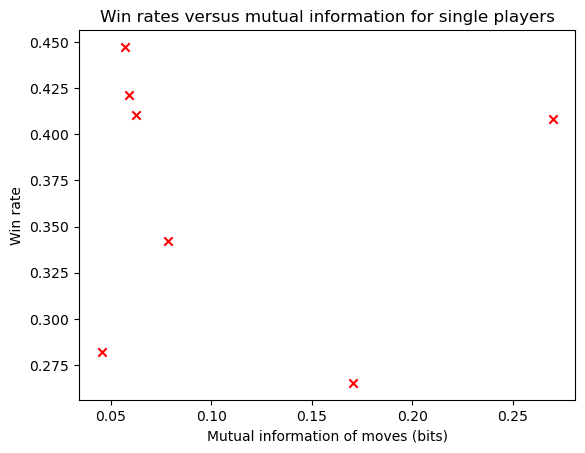

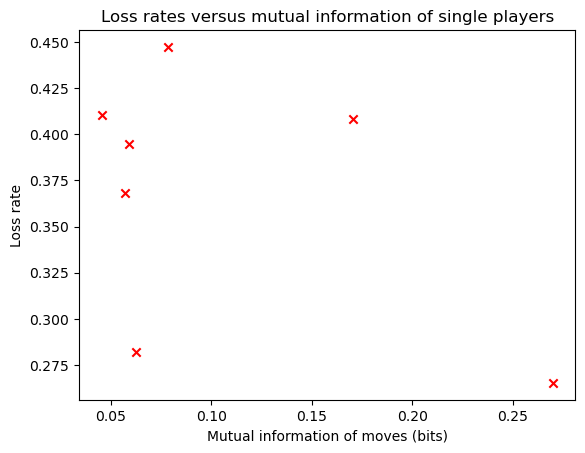

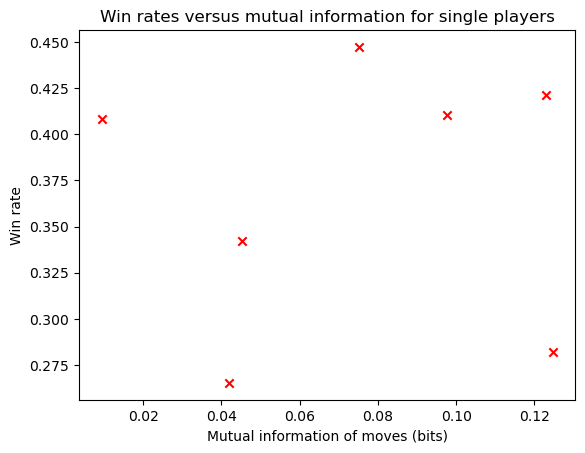

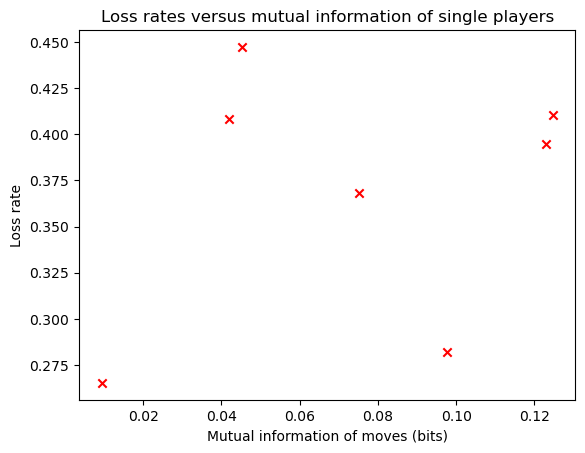

In [20]:
computeMutualInformationForAllPlayers(True)
computeMutualInformationForAllPlayers(False)

6. _Challenge_: are these correlation values statistically significant? As above, look up theory on how to compute whether a correlation value is statistically significant. To add this to the code above, you can check out the other return values from the `stats.pearson()` or `stats.spearmanr()` correlation functions.

# Stage 5 - Further analysis

Are there additional analyses that you would like to perform here?

E.g. measuring mutual information from (jointly) the previous move of the player and their opponent, to the player's next move. What would you hypothesise about that? Or, is there any mutual information between concurrent moves? What would that mean?